In [11]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(123)

# Parameters
n_schools = 2
n_students_per_school = 20
n_time_points = 3

# Fixed effects
intercept = 50  # Baseline score
slope = 5       # Average improvement per time point

# Random effects
random_intercepts = np.random.normal(0, 10, n_schools)  # School-specific intercepts
random_slopes = np.random.normal(0, 2, n_schools)       # School-specific slopes

# Generate data
data = []
for school in range(n_schools):
    for student in range(n_students_per_school):
        for time in range(n_time_points):
            # Fixed effects + random effects + residual error
            score = (intercept + random_intercepts[school]) + \
                    (slope + random_slopes[school]) * time + \
                    np.random.normal(0, 3)
            data.append([school, student, time, score])

# Create DataFrame
df = pd.DataFrame(data, columns=['school', 'student', 'time', 'score'])
df

,school,student,time,score
0,0,0,0,37.407893
1,0,0,1,49.663961
2,0,0,2,42.995570
3,0,1,0,37.856956
4,0,1,1,48.507460
...,...,...,...,...
115,1,18,1,55.885728
116,1,18,2,63.120918
117,1,19,0,58.317130
118,1,19,1,62.323107


In [12]:
import statsmodels.formula.api as smf

# Fit LMM with random intercept and slope
model = smf.mixedlm("score ~ time", df, groups="school", re_formula="~time")
result = model.fit()
print(result.summary())

           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  score    
No. Observations:    120      Method:              REML     
No. Groups:          2        Scale:               11.5935  
Min. group size:     60       Log-Likelihood:      -320.2974
Max. group size:     60       Converged:           Yes      
Mean group size:     60.0                                   
------------------------------------------------------------
                   Coef.  Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept          49.938   14.424 3.462 0.001 21.667 78.209
time                3.479    1.970 1.766 0.077 -0.381  7.340
school Var        415.624                                   
school x time Cov -55.718                                   
time Var            7.470                                   



/home/aayush/anaconda3/envs/pytorch/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/aayush/anaconda3/envs/pytorch/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/aayush/anaconda3/envs/pytorch/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


/tmp/ipykernel_241855/2968319486.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='time', y='score', data=df, ci=None, color='black', label='Population Trend')


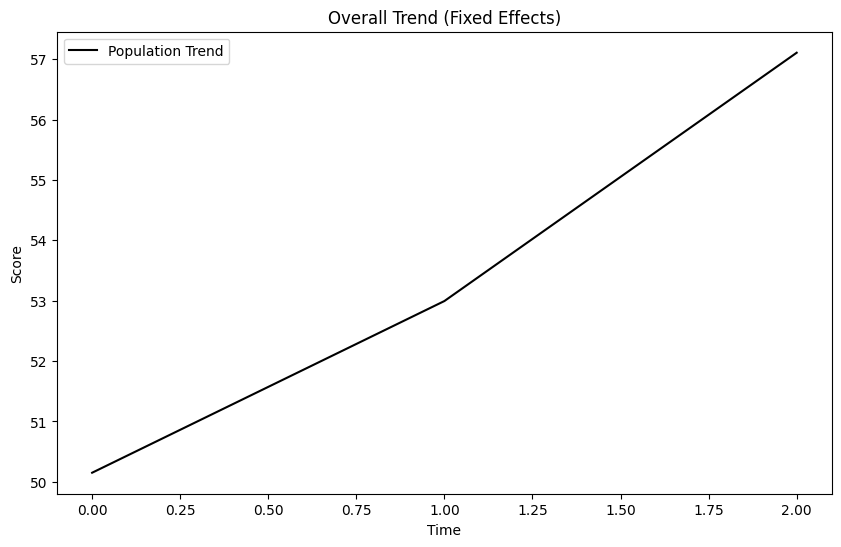

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot overall trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='score', data=df, ci=None, color='black', label='Population Trend')
plt.title("Overall Trend (Fixed Effects)")
plt.xlabel("Time")
plt.ylabel("Score")
plt.legend()
plt.show()

/tmp/ipykernel_241855/3250943776.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='time', y='score', data=df, ci=None, color='black', label='Population Trend')


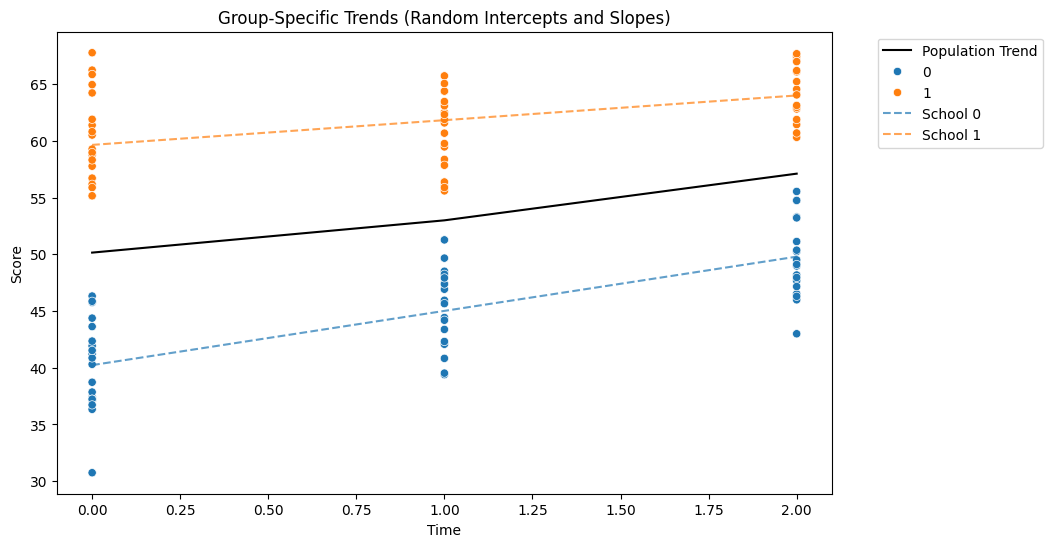

In [14]:
# Extract random effects
random_effects = result.random_effects

# Plot group-specific trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='score', data=df, ci=None, color='black', label='Population Trend')
sns.scatterplot(data=df,x='time',y='score',hue='school')
for school in range(n_schools):
    re = random_effects[school]
    intercept = result.fe_params['Intercept'] + re['school']
    slope = result.fe_params['time'] + re['time']
    x_vals = np.array([0, 2])
    plt.plot(x_vals, intercept + slope * x_vals, linestyle='--', alpha=0.7, label=f'School {school}')

plt.title("Group-Specific Trends (Random Intercepts and Slopes)")
plt.xlabel("Time")
plt.ylabel("Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [16]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(123)

# Parameters
n_samples = 500  # Number of houses
locations = ["Thamel", "Boudha", "Patan", "Koteshwor", "Budhanilkantha", "Swayambhu", "Lazimpat", "Jawalakhel"]
landmarks = ["Kathmandu Durbar Square", "Boudhanath Stupa", "Swayambhunath Stupa", "Pashupatinath Temple"]

# Generate synthetic data
data = {
    "Location": np.random.choice(locations, n_samples),
    "Property_Size_sqft": np.random.randint(800, 5000, n_samples),
    "Number_of_Rooms": np.random.randint(1, 6, n_samples),
    "Number_of_Bathrooms": np.random.randint(1, 4, n_samples),
    "Parking": np.random.choice([0, 1], n_samples, p=[0.3, 0.7]),
    "Garden": np.random.choice([0, 1], n_samples, p=[0.6, 0.4]),
    "Security": np.random.choice([0, 1], n_samples, p=[0.4, 0.6]),
    "Distance_to_Landmark_km": np.random.uniform(1, 10, n_samples),
    "Price_NPR": np.zeros(n_samples)  # Placeholder for price
}

# Create DataFrame
df = pd.DataFrame(data)

# Simulate price based on features
df["Price_NPR"] = (
    df["Property_Size_sqft"] * 1000 +  # Base price per sqft
    df["Number_of_Rooms"] * 500000 +   # Additional price per room
    df["Number_of_Bathrooms"] * 300000 +  # Additional price per bathroom
    df["Parking"] * 1000000 +  # Additional price for parking
    df["Garden"] * 800000 +  # Additional price for garden
    df["Security"] * 500000 +  # Additional price for security
    -df["Distance_to_Landmark_km"] * 200000  # Price reduction based on distance to landmark
    + np.random.normal(0, 500000, n_samples)  # Random noise
)

# Display the first few rows
df.head()

,Location,Property_Size_sqft,Number_of_Rooms,Number_of_Bathrooms,Parking,Garden,Security,Distance_to_Landmark_km,Price_NPR
0,Lazimpat,1472,1,2,1,0,1,6.278610,2.609640e+06
1,Swayambhu,4850,1,1,1,0,0,3.234269,6.577962e+06
2,Lazimpat,3799,4,3,0,0,0,9.618230,5.730051e+06
3,Patan,3225,3,3,1,0,1,6.136374,5.151013e+06
4,Budhanilkantha,2112,4,1,1,1,0,3.988279,5.619294e+06


/tmp/ipykernel_241855/3418951423.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Location", y="Price_NPR", data=df, palette="viridis")


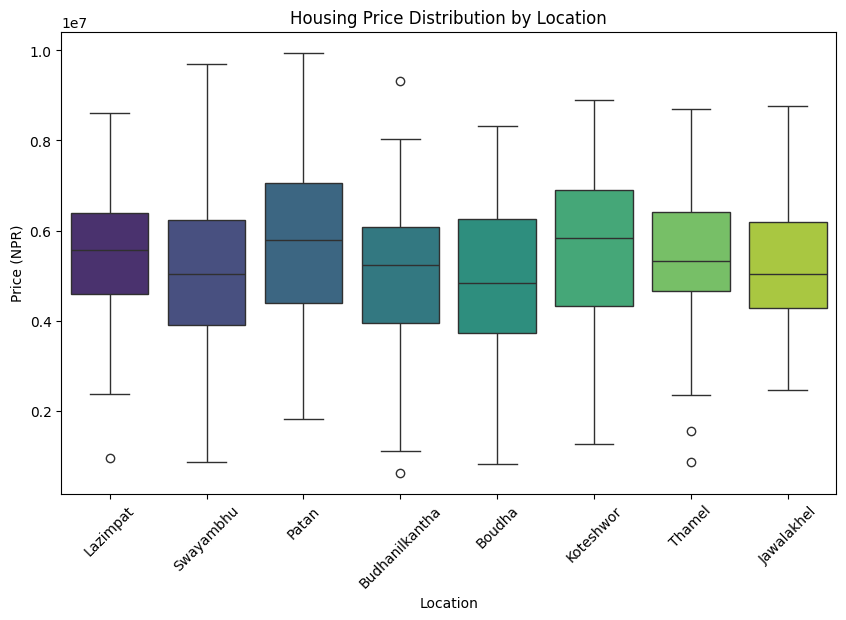

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x="Location", y="Price_NPR", data=df, palette="viridis")
plt.title("Housing Price Distribution by Location")
plt.xlabel("Location")
plt.ylabel("Price (NPR)")
plt.xticks(rotation=45)
plt.show()

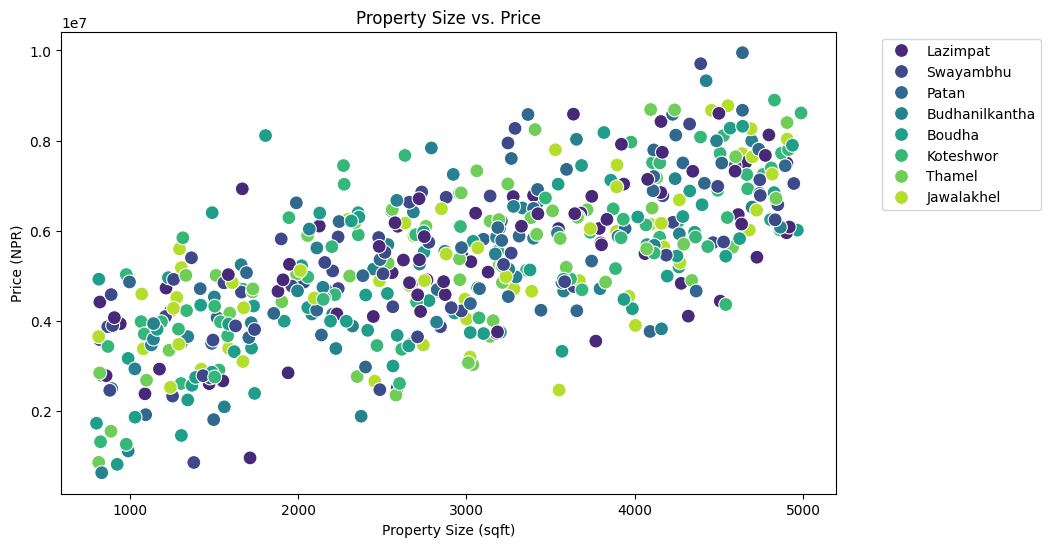

In [22]:
plt.figure(figsize=(10, 6))
# sns.lineplot(x="Property_Size_sqft", y="Price_NPR", hue="Location", data=df, palette="viridis")
sns.scatterplot(x="Property_Size_sqft", y="Price_NPR", hue="Location", data=df, palette="viridis", s=100)
plt.title("Property Size vs. Price")
plt.xlabel("Property Size (sqft)")
plt.ylabel("Price (NPR)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

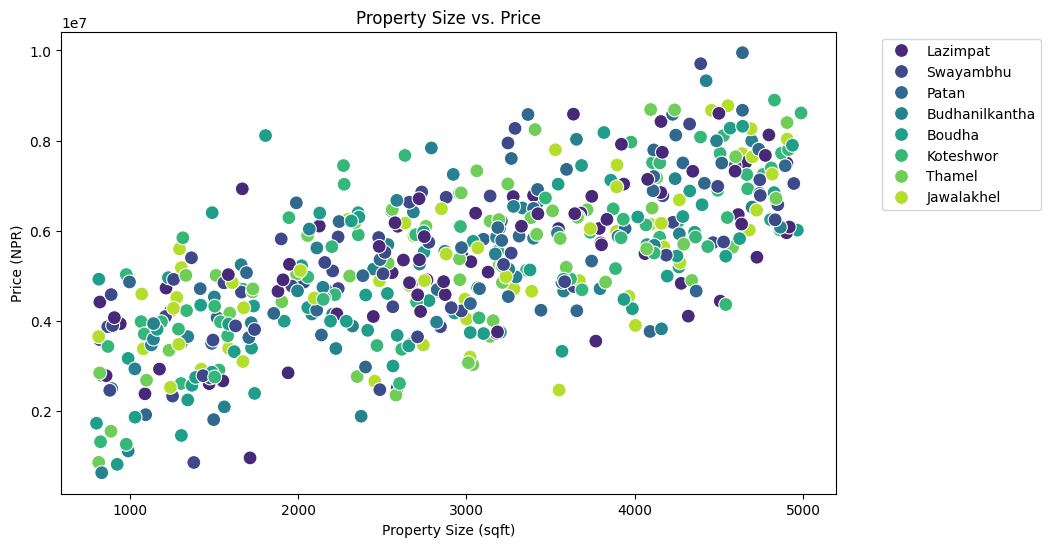

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Property_Size_sqft", y="Price_NPR", hue="Location", data=df, palette="viridis", s=100)
plt.title("Property Size vs. Price")
plt.xlabel("Property Size (sqft)")
plt.ylabel("Price (NPR)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

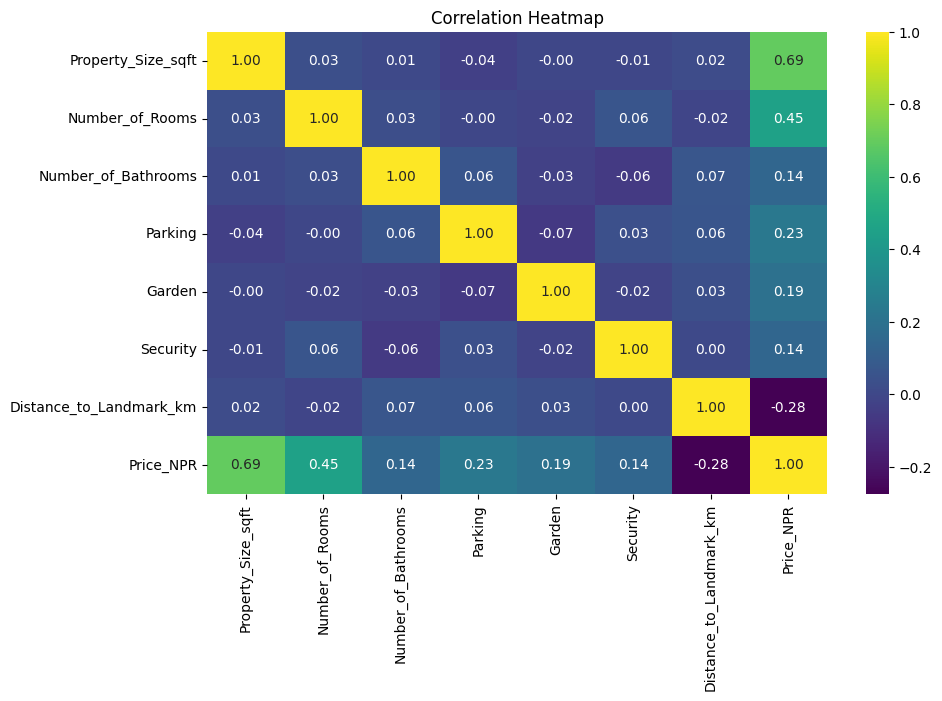

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [29]:
import statsmodels.formula.api as smf

# Fit LMM with random intercept and slope for Property_Size_sqft by Location
model = smf.mixedlm(
    formula="Price_NPR ~ Property_Size_sqft + Number_of_Rooms + Number_of_Bathrooms + \
             Parking + Garden + Security + Distance_to_Landmark_km",
    data=df,
    groups="Location",  # Grouping variable (neighborhoods)
    re_formula="~Property_Size_sqft"  # Random slope for property size
)

# Fit the model
result = model.fit()
print(result.summary())

/home/aayush/anaconda3/envs/pytorch/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/aayush/anaconda3/envs/pytorch/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/aayush/anaconda3/envs/pytorch/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/aayush/anaconda3/envs/pytorch/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


                              Mixed Linear Model Regression Results
Model:                        MixedLM            Dependent Variable:            Price_NPR        
No. Observations:             500                Method:                        REML             
No. Groups:                   8                  Scale:                         266566711552.1969
Min. group size:              53                 Log-Likelihood:                -7227.4742       
Max. group size:              78                 Converged:                     No               
Mean group size:              62.5                                                               
-------------------------------------------------------------------------------------------------
                                      Coef.       Std.Err.     z    P>|z|    [0.025      0.975]  
-------------------------------------------------------------------------------------------------
Intercept                              31428.737 1

/home/aayush/anaconda3/envs/pytorch/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/aayush/anaconda3/envs/pytorch/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/home/aayush/anaconda3/envs/pytorch/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 4201.914936
  warnings.warn(msg, ConvergenceWarning)
/home/aayush/anaconda3/envs/pytorch/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [32]:
locations

array(['Lazimpat', 'Swayambhu', 'Patan', 'Budhanilkantha', 'Boudha',
       'Koteshwor', 'Thamel', 'Jawalakhel'], dtype=object)

In [38]:
random_intercepts['Boudha'].keys()

Index(['Location', 'Property_Size_sqft'], dtype='object')

/tmp/ipykernel_241855/3713679000.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


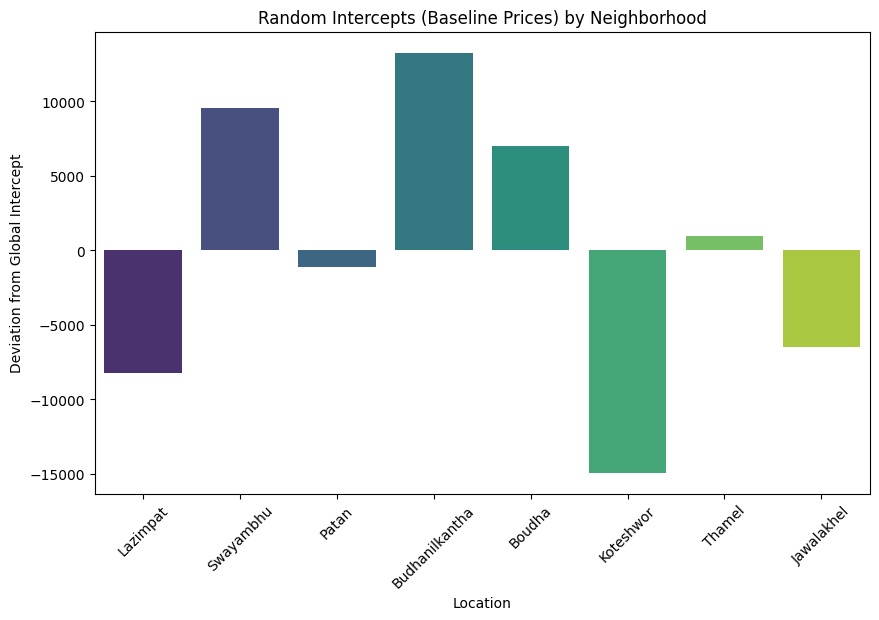

In [39]:
# Extract random intercepts
random_intercepts = result.random_effects
locations = df['Location'].unique()

# Plot baseline prices (intercepts)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=locations,
    y=[random_intercepts[loc]['Location'] for loc in locations],
    palette="viridis"
)
plt.title("Random Intercepts (Baseline Prices) by Neighborhood")
plt.xlabel("Location")
plt.ylabel("Deviation from Global Intercept")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_241855/2901558316.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=locations, y=slopes, palette="viridis")


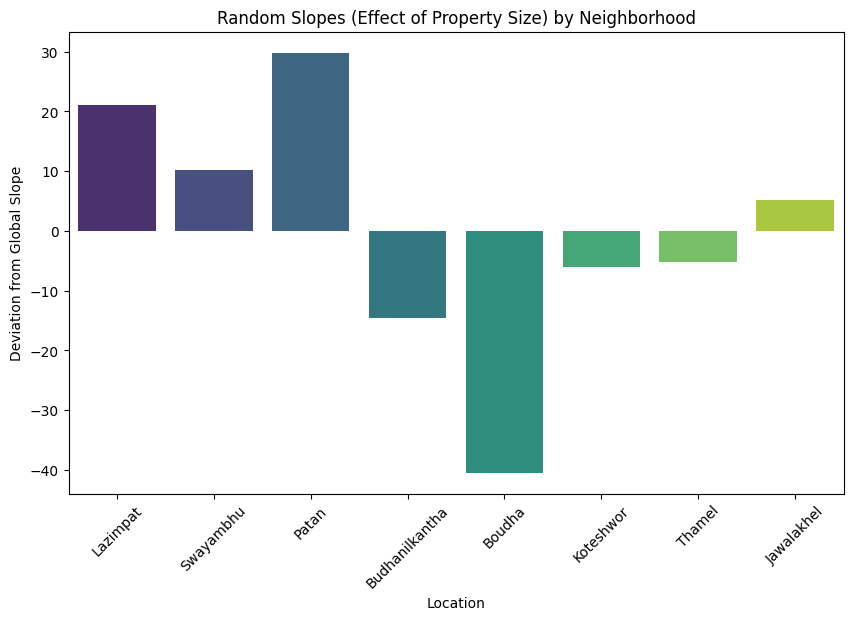

In [40]:
# Extract random slopes
slopes = [random_intercepts[loc]['Property_Size_sqft'] for loc in locations]

# Plot slopes
plt.figure(figsize=(10, 6))
sns.barplot(x=locations, y=slopes, palette="viridis")
plt.title("Random Slopes (Effect of Property Size) by Neighborhood")
plt.xlabel("Location")
plt.ylabel("Deviation from Global Slope")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_241855/2901558316.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=locations, y=slopes, palette="viridis")


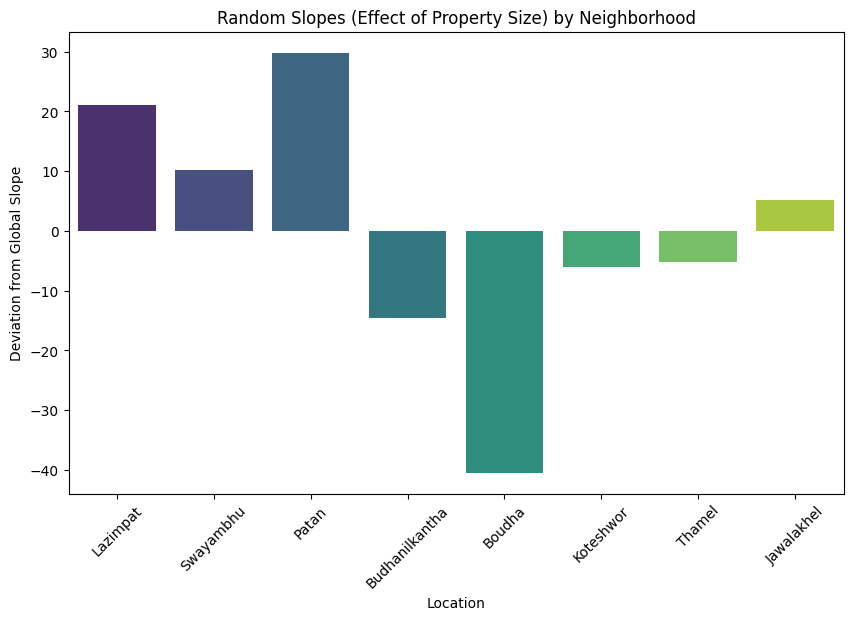

In [41]:
# Extract random slopes
slopes = [random_intercepts[loc]['Property_Size_sqft'] for loc in locations]

# Plot slopes
plt.figure(figsize=(10, 6))
sns.barplot(x=locations, y=slopes, palette="viridis")
plt.title("Random Slopes (Effect of Property Size) by Neighborhood")
plt.xlabel("Location")
plt.ylabel("Deviation from Global Slope")
plt.xticks(rotation=45)
plt.show()